In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
data = pd.read_csv("heart.csv")

In [137]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


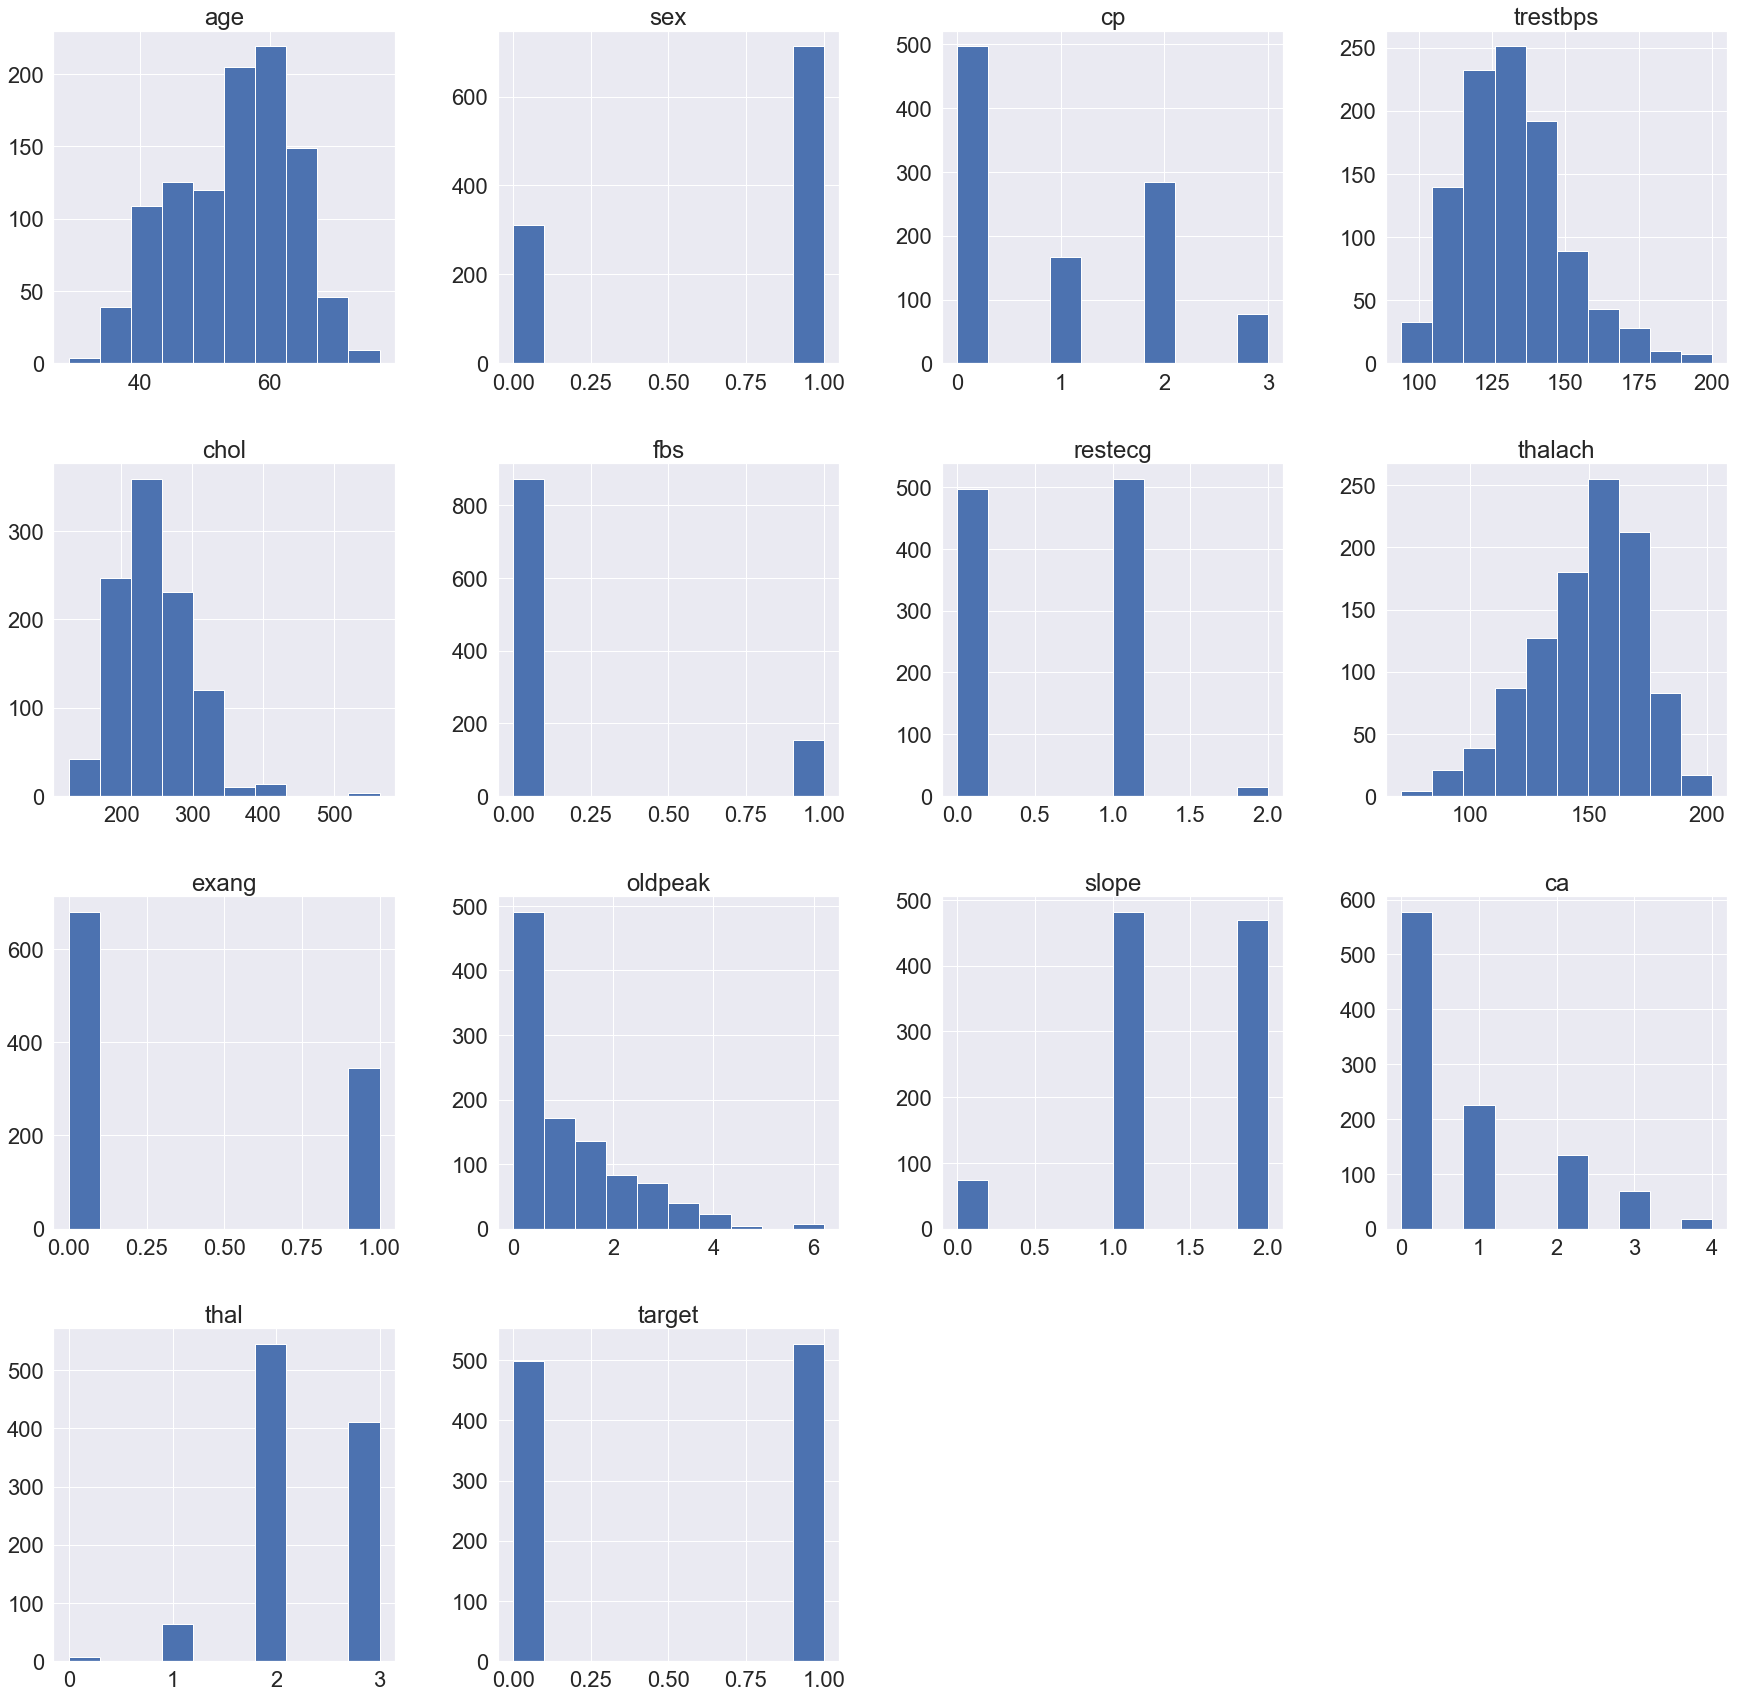

In [138]:
sns.set(font_scale = 2)
data.hist(figsize = (30, 30))
plt.show()

In [139]:
data.columns
dc = list(data.columns)
print(dc)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [140]:
dc.remove('target')

In [141]:
en =enumerate(list(dc),1)
print(list(en))

[(1, 'age'), (2, 'sex'), (3, 'cp'), (4, 'trestbps'), (5, 'chol'), (6, 'fbs'), (7, 'restecg'), (8, 'thalach'), (9, 'exang'), (10, 'oldpeak'), (11, 'slope'), (12, 'ca'), (13, 'thal')]


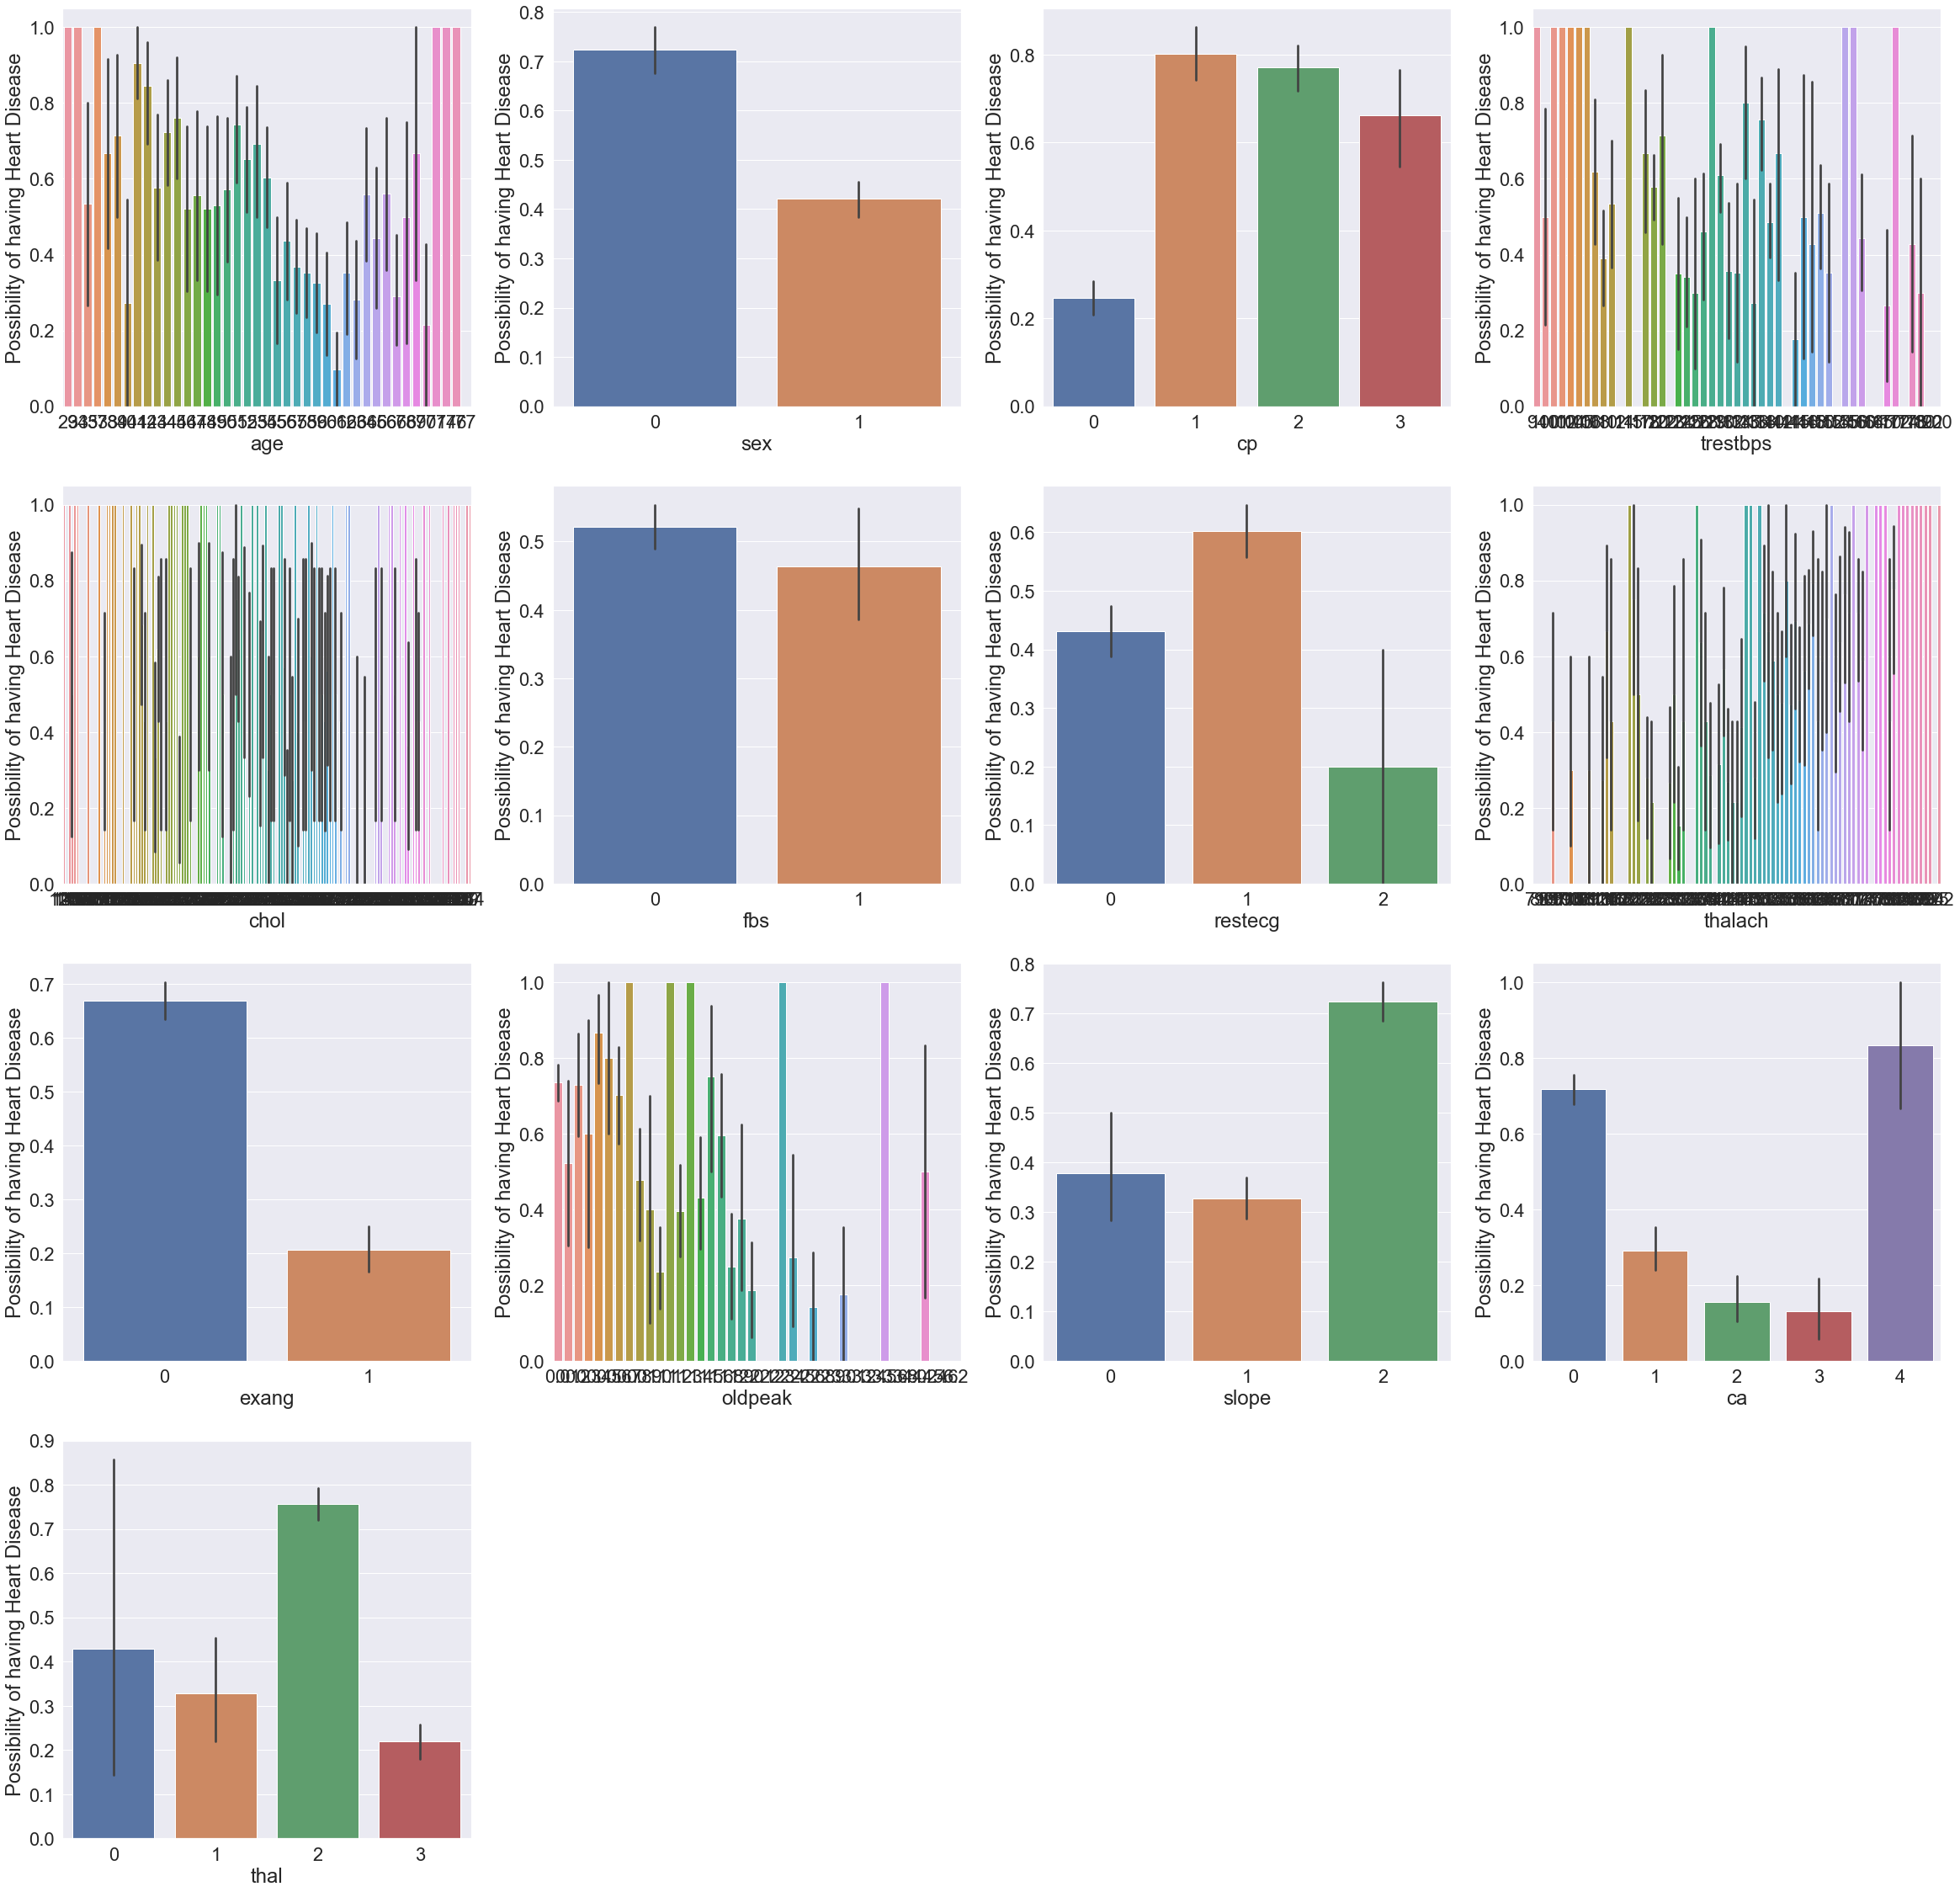

In [142]:
plt.figure(figsize=(40, 40))
for i, col in enumerate(list(dc),1):
    plt.subplot(4,4,i)
    sns.barplot(x=f"{col}", y='target', data=data)
    plt.ylabel("Possibility of having Heart Disease")
    plt.xlabel(f"{col}")

In [143]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [144]:
x = data.drop('target', axis = 1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [162]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc*100)

72.1951219512195


In [173]:
import warnings
with warnings.catch_warnings(record=True):
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    acc1 = accuracy_score(y_test, y_pred)
    print(acc1*100)

85.36585365853658


In [166]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
acc3 = accuracy_score(y_test, y_pred)
print(acc3*100)

98.53658536585365


In [167]:
RT = RandomForestClassifier()
RT.fit(x_train, y_train)
y_pred = RT.predict(x_test)
acc4 = accuracy_score(y_test, y_pred)
print(acc4*100)

98.53658536585365


In [168]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test)
acc5 = accuracy_score(y_test, y_pred)
print(acc5*100)

82.92682926829268


In [165]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RT', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
print(models)

[('KNN', KNeighborsClassifier()), ('LR', LogisticRegression()), ('DT', DecisionTreeClassifier()), ('RT', RandomForestClassifier()), ('GNB', GaussianNB())]


In [146]:
for name, model in models:
    print(name)
    print(model)

KNN
KNeighborsClassifier()
LR
LogisticRegression()
DT
DecisionTreeClassifier()
RT
RandomForestClassifier()
GNB
GaussianNB()


In [172]:
import warnings
with warnings.catch_warnings(record=True):
    names = []
    results = []

    for name, model in models:
        obj = model
        names.append(name)
        obj.fit(x_train, y_train)
        y_pred = obj.predict(x_test)
        acc = accuracy_score(y_test, y_pred)*100
        results.append(acc)
        print(results)

[72.1951219512195]
[72.1951219512195, 85.36585365853658]
[72.1951219512195, 85.36585365853658, 98.53658536585365]
[72.1951219512195, 85.36585365853658, 98.53658536585365, 98.53658536585365]
[72.1951219512195, 85.36585365853658, 98.53658536585365, 98.53658536585365, 82.92682926829268]


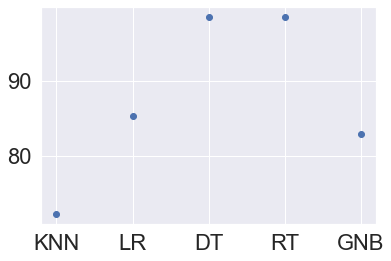

In [186]:
plt.scatter(names, results)
plt.show()

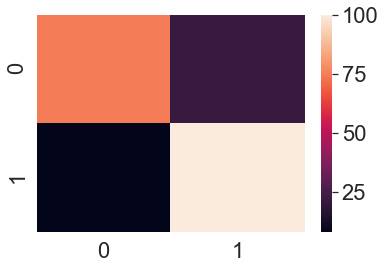

In [181]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm)
plt.show()